<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [2]:
import pandas as pd

C:\Users\aylwo\AppData\Local\Temp\ipykernel_20644\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cetacean_acquisitions_df = pd.read_csv('acquisitions.csv', sep=',')

In [4]:
print(cetacean_acquisitions_df)

    Unnamed: 0  AcqYear  Born  Capture  Rescue  Total
0            1     1938     0        5       0      5
1            2     1939     0        7       0      7
2            3     1940     0        0       0      0
3            4     1941     0        0       0      0
4            5     1942     0        0       0      0
..         ...      ...   ...      ...     ...    ...
75          76     2013    23        0       0     23
76          77     2014    24        0       2     26
77          78     2015    20        0       2     22
78          79     2016    18        0       1     19
79          80     2017     1        0       0      1

[80 rows x 6 columns]


In [5]:
cetacean_acquisitions_df.describe()

,Unnamed: 0,AcqYear,Born,Capture,Rescue,Total
count,80.0000,80.0000,80.000000,80.000000,80.000000,80.00000
mean,40.5000,1977.5000,13.137500,20.475000,2.050000,35.66250
std,23.2379,23.2379,12.600727,33.038901,2.469562,33.25275
min,1.0000,1938.0000,0.000000,0.000000,0.000000,0.00000
25%,20.7500,1957.7500,1.000000,0.000000,0.000000,6.75000
50%,40.5000,1977.5000,10.500000,3.000000,1.000000,33.00000
75%,60.2500,1997.2500,23.250000,37.250000,3.250000,51.25000
max,80.0000,2017.0000,40.000000,203.000000,10.000000,207.00000


At a glance from the describe function, most acquisitions were through capture.
However conclusions, negative or positive, cannot be drawn from this dataset alone.
The notes accompanying this dataset(and the other two datasets that contribute to this research) state that individuals falling under the rescue category are those "that were rescued and were deemed unreleasable during a calendar year. This count only includes the animals that survived but could not be released and thus joined the captive US community."
Thus, individuals under the capture category may have been rescued from illegal trade, captured for treatment of sickness or injury. 
 

In [8]:
cetacean_acquisitions_df['Capture']

0     5
1     7
2     0
3     0
4     0
     ..
75    0
76    0
77    0
78    0
79    0
Name: Capture, Length: 80, dtype: int64

In [10]:
cetacean_acquisitions_df['AcqYear']

0     1938
1     1939
2     1940
3     1941
4     1942
      ... 
75    2013
76    2014
77    2015
78    2016
79    2017
Name: AcqYear, Length: 80, dtype: int64

In [13]:
cetacean_acquisitions_df.keys()

Index(['Unnamed: 0', 'AcqYear', 'Born', 'Capture', 'Rescue', 'Total'], dtype='object')

In [12]:
cetacean_acquisitions_df[['AcqYear', 'Born', 'Capture', 'Rescue']]

,AcqYear,Born,Capture,Rescue
0,1938,0,5,0
1,1939,0,7,0
2,1940,0,0,0
3,1941,0,0,0
4,1942,0,0,0
...,...,...,...,...
75,2013,23,0,0
76,2014,24,0,2
77,2015,20,0,2
78,2016,18,0,1


By listing the columns, an easy comparison can be made of the earliest years included in this study (1938-1942) and the latest (2013-2017). 
There seems to be a significant increase in those born in captivity and a small increase in rescues in the later years, potentially due to growing awareness and efforts for conservation and breeding programmes.

In [24]:
cetaceans_df = pd.read_csv('allCetaceanData.csv', encoding='latin-1', sep=',')

In [19]:
print(cetaceans_df)

      Unnamed: 0              species  \
0              1           Bottlenose   
1              2           Bottlenose   
2              3           Bottlenose   
3              4           Bottlenose   
4              5           Bottlenose   
...          ...                  ...   
2189        2190           Bottlenose   
2190        2191  Pacific White-Sided   
2191        2192           Bottlenose   
2192        2193           Bottlenose   
2193        2194           Bottlenose   

                                                     id      name sex  \
0                          NOA0004614, AZA 428, MLF-428    Dazzle   F   
1                         NOA0004386, AZA 138, IDR-73-1     Tursi   F   
2                              NOA0002137, SWC-TTG-7816  Starbuck   M   
3                               NOA0002690, SWF-TT-7903     Sandy   F   
4     NOA0004418, AZA 242, SWF-TT-7904, MH-82-36-TT ...     Sandy   M   
...                                                 ...       ...  ..

In [26]:
cetaceans_df.head()

,Unnamed: 0,species,id,name,sex,accuracy,birthYear,acquisition,originDate,originLocation,...,transfers,currently,region,status,statusDate,COD,notes,transferDate,transfer,entryDate
0,1,Bottlenose,"NOA0004614, AZA 428, MLF-428",Dazzle,F,a,1989,Born,1989-04-07,Marineland Florida,...,NaN,Marineland Florida,US,Alive,NaN,NaN,NaN,NaN,US,1989-04-07
1,2,Bottlenose,"NOA0004386, AZA 138, IDR-73-1",Tursi,F,a,1973,Born,1973-11-26,Dolphin Research Center,...,NaN,Dolphin Research Center,US,Alive,NaN,NaN,NaN,NaN,US,1973-11-26
2,3,Bottlenose,"NOA0002137, SWC-TTG-7816",Starbuck,M,a,1978,Born,1978-05-13,SeaWorld San Diego,...,SeaWorld San Diego to SeaWorld Aurora (??-???-...,SeaWorld Orlando,US,Alive,NaN,NaN,NaN,NaN,US,1978-05-13
3,4,Bottlenose,"NOA0002690, SWF-TT-7903",Sandy,F,a,1979,Born,1979-02-03,SeaWorld Orlando,...,SeaWorld Orlando to SeaWorld San Diego (< Aug ...,SeaWorld San Diego,US,Alive,NaN,NaN,NaN,NaN,US,1979-02-03
4,5,Bottlenose,"NOA0004418, AZA 242, SWF-TT-7904, MH-82-36-TT ...",Sandy,M,a,1979,Born,1979-08-15,SeaWorld Orlando,...,SeaWorld Orlando to New England Aquarium (22-F...,Dolphin Research Center,US,Alive,NaN,NaN,NaN,NaN,US,1979-08-15


In [21]:
cetaceans_df['COD'].unique()

array([nan,
       'Geriatric animal, age-related cardiovascular & central nervous system degeneration',
       'Hepatic necrosis, gastritis', ...,
       'DERMATITIS, SUBACUTE (IN TRANSIT)',
       'hepatic necrosis; pregnant/capture shock',
       'gastritis; enteritis; old age'], dtype=object)

In [22]:
cetaceans_df['COD'].value_counts()

COD
-                                                                   113
Pneumonia                                                            41
PNEUMONIA                                                            39
Euthanasia                                                           18
Euthanasia: Life threatening condition involving\rpain/suffering     18
                                                                   ... 
Hepatic cirrhosis                                                     1
Peritonitis, pneumonia                                                1
Extracranial abscess                                                  1
Severe parasitic pneumonia                                            1
gastritis; enteritis; old age                                         1
Name: count, Length: 1002, dtype: int64

Highest value in Cause of Death is '-' standing for unknown. 113 counts of unknown causes of death. 
The usability of this dataset could be a difficult factor here as there are issues with the styling evidenced by Pneumonia in full CapsLock. 
Pneumonia is the most common known cause of death. 

In [27]:
cetaceans_df[cetaceans_df['COD'] == 'Pneumonia']

,Unnamed: 0,species,id,name,sex,accuracy,birthYear,acquisition,originDate,originLocation,...,transfers,currently,region,status,statusDate,COD,notes,transferDate,transfer,entryDate
479,480,Bottlenose,"NOA0000694, AZA 1046, ISIS 910233",Windy's Calf,M,a,1991,Born,1991-10-05,Brookfield Zoo,...,NaN,Brookfield Zoo,US,Died,1991-10-21,Pneumonia,"Sired by a male named Stormy who was renamed ""...",NaN,US,1991-10-05
517,518,Bottlenose,"NOA0000695, AZA 183, SWF-TT-8602, 920002 (ISIS)",Rebel,M,e,1978,Capture,1982-10-27,"Gulf of Mexico, MS, US",...,"Mississippi, Gulf of Mexico to Dinnes, Marty (...",Dolphin Connection,US,Died,1994-09-29,Pneumonia,NaN,NaN,US,1982-10-27
546,547,Bottlenose,"NOA0004377, 009 (Flipper's Sea School)",Sonny,M,e,NaN,Capture,1964-01-01,Florida,...,Unknown to Dolphin Research Center (??-???-????),Dolphin Research Center,US,Died,1973-06-04,Pneumonia,NaN,NaN,US,1964-01-01
664,665,Bottlenose,"NOA0004575, MLF-232",Snoopy,M,e,1967,Capture,1968-05-01,Florida,...,Florida to Marineland of Florida (01-May-1968),Marineland Florida,US,Died,1982-11-28,Pneumonia,NaN,NaN,US,1968-05-01
665,666,Bottlenose,"NOA0004577, MLF-237",Splash Iii,M,e,1966,Capture,1968-05-31,Florida,...,Florida to Marineland of Florida (31-May-1968),Marineland Florida,US,Died,1975-11-20,Pneumonia,NaN,NaN,US,1968-05-31
668,669,Bottlenose,"NOA0004600, MLF-251",Amber,F,e,NaN,Capture,1968-08-23,Florida,...,Florida to Marineland of Florida (23-Aug-1968),Marineland Florida,US,Died,1973-02-12,Pneumonia,NaN,NaN,US,1968-08-23
678,679,"Spotted, Atlantic","NOA0004601, MLF-339",Neona,F,e,NaN,Capture,1972-03-13,Florida,...,Florida to Marineland of Florida (13-Mar-1972),Marineland Florida,US,Died,1973-11-23,Pneumonia,NaN,NaN,US,1972-03-13
686,687,Bottlenose,"NOA0004598, MLF-359",NaN,U,e,NaN,Capture,1972-10-03,Florida,...,Florida to Marineland of Florida (13-Oct-1972),Marineland Florida,US,Died,1973-11-27,Pneumonia,NaN,NaN,US,1972-10-03
687,688,Bottlenose,"NOA0004591, MLF-365",Jenny,F,e,1969,Capture,1972-10-18,Florida,...,Florida to Marineland of Florida (18-Oct-1972),Marineland Florida,US,Died,1974-02-25,Pneumonia,NaN,NaN,US,1972-10-18
689,690,Bottlenose,"NOA0004589, MLF-360",Patti,F,e,1969,Capture,1972-10-30,Florida,...,Florida to Marineland of Florida (30-Oct-1972),Marineland Florida,US,Died,1974-05-21,Pneumonia,NaN,NaN,US,1972-10-30


array([[<Axes: title={'center': 'Rescue'}>]], dtype=object)

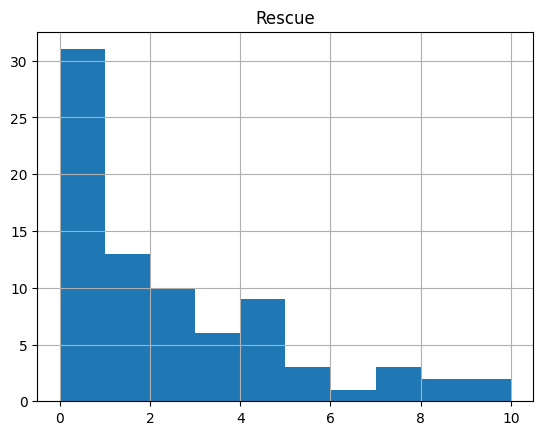

In [28]:
cetacean_acquisitions_df.hist('Rescue')

In [38]:
acq_df = pd.DataFrame(cetacean_acquisitions_df)

In [44]:
acq_df

,Unnamed: 0,AcqYear,Born,Capture,Rescue,Total
0,1,1938,0,5,0,5
1,2,1939,0,7,0,7
2,3,1940,0,0,0,0
3,4,1941,0,0,0,0
4,5,1942,0,0,0,0
...,...,...,...,...,...,...
75,76,2013,23,0,0,23
76,77,2014,24,0,2,26
77,78,2015,20,0,2,22
78,79,2016,18,0,1,19


In [ ]:
acq_df.set_index('AcqYear', inplace=True)

<Axes: xlabel='AcqYear'>

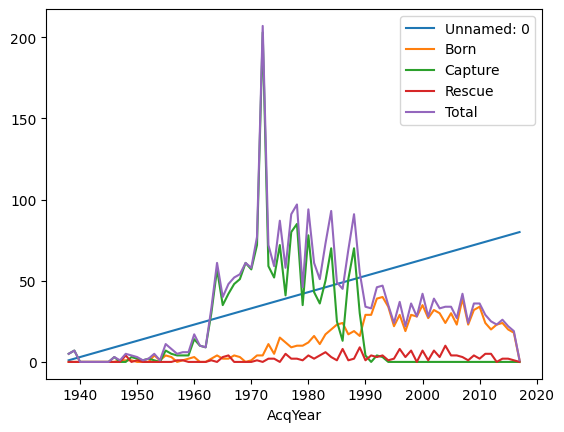

In [52]:
acq_df.plot()

In [63]:
acq_df.keys()

Index(['Born', 'Capture', 'Rescue', 'Total'], dtype='object')

In [71]:
cetacean_acquisitions_df = pd.read_csv('acquisitions.csv', sep=',')

Had to re-define the csv because I couldn't retrieve the AcqYear as a column after setting it as an index. 

<Axes: xlabel='AcqYear'>

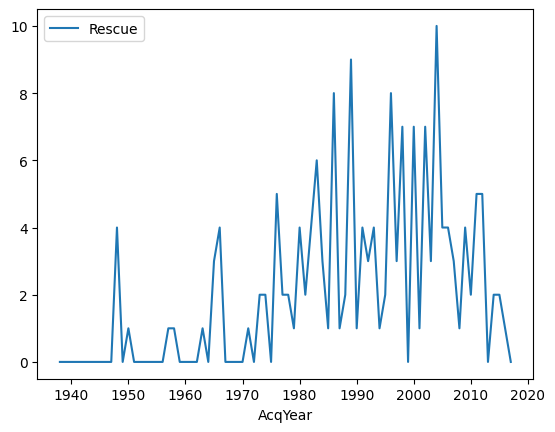

In [73]:
cetacean_acquisitions_df.plot(x='AcqYear', y='Rescue')

Not sure how to set x and y axis for histogram yet